## SVM Animation — Changing C (Regularization Strength)

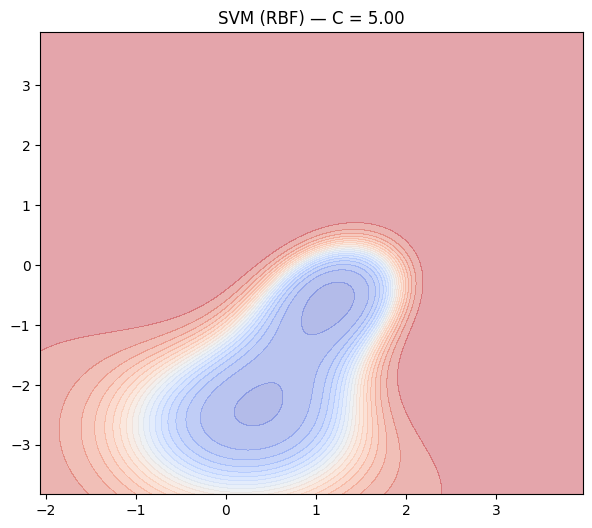

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create folder
os.makedirs("gifs", exist_ok=True)

# Generate dataset
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1, random_state=42
)

# Create grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Values of C to animate
C_values = np.linspace(0.1, 5, 40)

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

def update(i):
    # Remove existing contours safely
    while ax.collections:
        ax.collections[-1].remove()

    C = C_values[i]

    # Create SVM (RBF Kernel)
    model = SVC(kernel="rbf", C=C, gamma='scale', probability=True)
    model.fit(X, y)

    # Predict on grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid_points)[:, 1].reshape(xx.shape)

    # Plot decision surface
    ax.contourf(xx, yy, probs, levels=20, cmap="coolwarm", alpha=0.4)
    ax.set_title(f"SVM (RBF) — C = {C:.2f}")

ani = FuncAnimation(fig, update, frames=len(C_values), interval=150)

# Save GIF
ani.save("gifs/svm_decision_boundary.gif", writer="pillow")

plt.show()
